In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

random_state = 5555

In [2]:
customers_p = pd.read_csv('customers.csv', sep=';', index_col=0)

In [3]:
customers = customers_p.copy()
customers.Sexo = customers.Sexo.replace({"Male": 0, "Female": 1})

customers.info()

customers.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Sexo      200 non-null    int64
 1   Edad      200 non-null    int64
 2   Ingresos  200 non-null    int64
 3   Score     200 non-null    int64
dtypes: int64(4)
memory usage: 7.8 KB


,Sexo,Edad,Ingresos,Score
ID,,,,
1,0,19,15,39
2,0,21,15,81
3,1,20,16,6
4,1,23,16,77
5,1,31,17,40


In [207]:
customers.groupby(['Sexo']).describe().transpose()

Sexo                     0           1
Edad     count   88.000000  112.000000
         mean    39.806818   38.098214
         std     15.514812   12.644095
         min     18.000000   18.000000
         25%     27.750000   29.000000
         50%     37.000000   35.000000
         75%     50.500000   47.500000
         max     70.000000   68.000000
Ingresos count   88.000000  112.000000
         mean    62.227273   59.250000
         std     26.638373   26.011952
         min     15.000000   16.000000
         25%     45.500000   39.750000
         50%     62.500000   60.000000
         75%     78.000000   77.250000
         max    137.000000  126.000000
Score    count   88.000000  112.000000
         mean    48.511364   51.526786
         std     27.896770   24.114950
         min      1.000000    5.000000
         25%     24.500000   35.000000
         50%     50.000000   50.000000
         75%     70.000000   73.000000
         max     97.000000   99.000000

Standarise the values to have better results with the algorithm because the different variables are in different scales

In [208]:
stSc = StandardScaler();
ctmrs_scld = stSc.fit_transform(customers);
ctmrs_scld = pd.DataFrame(ctmrs_scld, columns=customers.columns)
ctmrs_scld.head()

,Sexo,Edad,Ingresos,Score
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980


In [209]:
n_clusters_df = pd.DataFrame()


In [211]:
def find_clusters(df_st, randomSt, n_clustersdf):
    elbow = []
    sil = []
    cali = []
    for i in range(2, 20, 1):
        kmeans = KMeans(n_clusters=i, tol=0.001, random_state=randomSt)
        kmeans.fit(df_st)
        elbow.append(kmeans.inertia_)
        sil.append(silhouette_score(df_st, kmeans.labels_))
        cali.append(calinski_harabasz_score(df_st, kmeans.labels_))
    n_clusters_df['Elbow'] = elbow
    n_clusters_df['Silhouette'] = sil
    n_clusters_df['Calinski'] = cali
    n_clusters_df.index = range(2,20,1)
    return n_clustersdf

In [212]:
n_clusters_df = find_clusters(ctmrs_scld, random_state, n_clusters_df)

c:\Users\blai\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\blai\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\blai\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\blai\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

In [213]:
n_clusters_df.head()

,Elbow,Silhouette,Calinski
2,588.802677,0.251815,71.020516
3,476.860069,0.261884,66.747638
4,386.714786,0.301624,69.822261
5,326.276755,0.317084,70.780428
6,275.814330,0.336186,73.739475


In [214]:
def show_nC(df):
    colors = ['yellow', 'blue', 'red']
    for i, column in enumerate(df.columns):
        x, y = df.index, df[column]
        plt.plot(x, y, color=colors[i], label=column)
        plt.title(f'{column}')
        plt.grid(True)
        plt.xlabel('Num Clusters')
        plt.legend()
        plt.show()

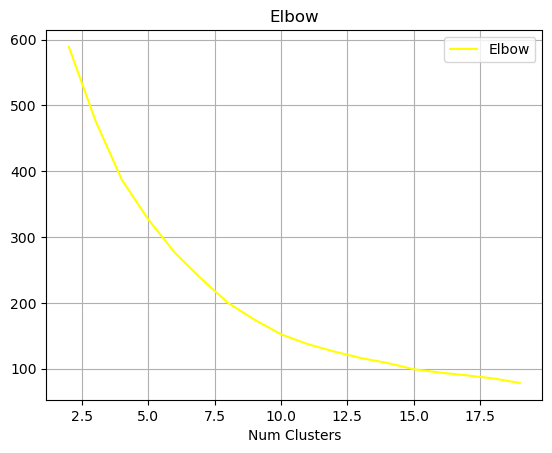

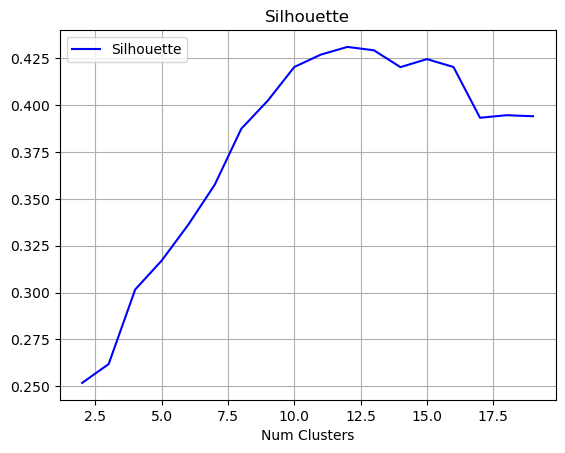

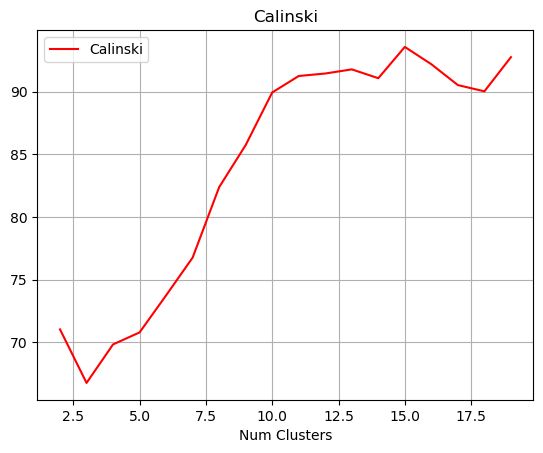

In [215]:
show_nC(n_clusters_df)

In [216]:
def best_score (df):
    best_elbow_cluster = df['Elbow'].idxmin()

    best_sil_cluster = df['Silhouette'].idxmax()

    best_cali_cluster = df['Calinski'].idxmax()

    print(f"The best value with the Elbow method is: '{best_elbow_cluster}' \n The best value with the Silhouette method is: '{best_sil_cluster}' \n The best value with the Calinski method is: '{best_cali_cluster}")

In [217]:
best_score(n_clusters_df)

The best value with the Elbow method is: '19' 
 The best value with the Silhouette method is: '12' 
 The best value with the Calinski method is: '15


Only taking my visual inspection of the plots, the elbow method did not show a clear "elbow" point for determining the number of clusters. However the Silhouette and Calinski index suggests that the optimal number may be between 10 and 12.
Despite the discrepancy by the "best_score" function, I decide to proceed with 12.

At the end of the modelling phase I saw that one Cluster is identically to other, and proceed with 11.


In [218]:
def kmeans_v(df, nC):
    kmean = KMeans(n_clusters=nC, tol=0.001, random_state=random_state).fit(df)
    labels = kmean.predict(df)
    customers_p['Cluster']=labels
    return labels

In [219]:
lbls = kmeans_v(ctmrs_scld, 11)

c:\Users\blai\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\blai\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [220]:
def show_by_2_v(labels, x, y, title):
    palette = sns.color_palette("colorblind", 12)
    colors = [tuple(color) for color in palette]
    plt.scatter(x, y, c=labels, s=50, cmap= ListedColormap(colors))
    plt.title(f"{title}")
    plt.show()

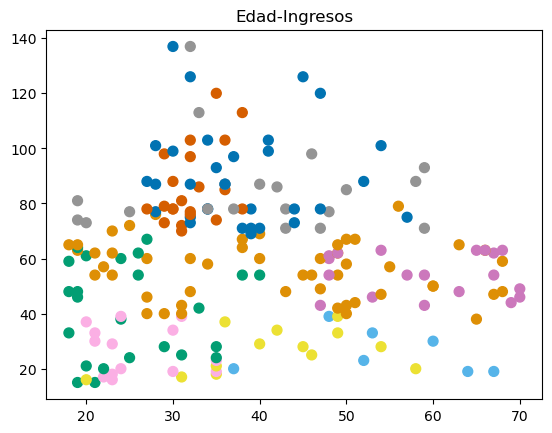

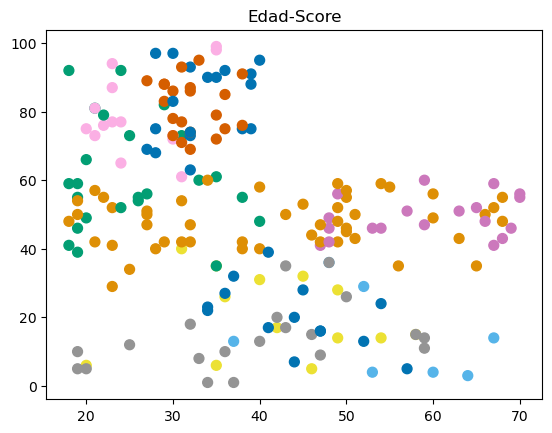

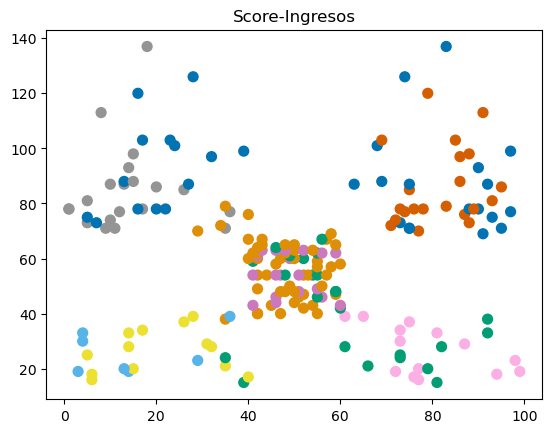

In [221]:
show_by_2_v(lbls, customers_p['Edad'].values, customers_p['Ingresos'].values, 'Edad-Ingresos')

show_by_2_v(lbls, customers_p['Edad'].values, customers_p['Score'].values, 'Edad-Score')

show_by_2_v(lbls, customers_p['Score'].values, customers_p['Ingresos'].values, 'Score-Ingresos')

Let's compare the different groups of customers.

In [222]:
customers_p.groupby(['Cluster', 'Sexo']).agg({'Edad':['count', 'mean'], 'Ingresos':['mean'], 'Score':['mean']})

Edad              Ingresos      Score
               count       mean       mean       mean
Cluster Sexo                                         
0       Male      18  33.277778  87.111111  82.666667
1       Female    26  54.153846  54.230769  48.961538
2       Male      24  25.250000  41.250000  60.916667
3       Female    21  32.190476  86.047619  81.666667
4       Male      19  59.315789  54.315789  49.210526
5       Female    14  25.857143  26.642857  79.142857
6       Male      20  39.500000  85.150000  14.050000
7       Female    13  41.538462  26.538462  20.692308
8       Male       7  54.428571  26.142857  14.714286
9       Female    14  43.785714  93.285714  20.642857
10      Female    24  27.833333  58.125000  46.541667

C:\Users\blai\AppData\Local\Temp\ipykernel_27676\2544118041.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ax = customers_p.groupby('Cluster').mean().plot(kind='bar',figsize=(10,8), title='Means Compared')


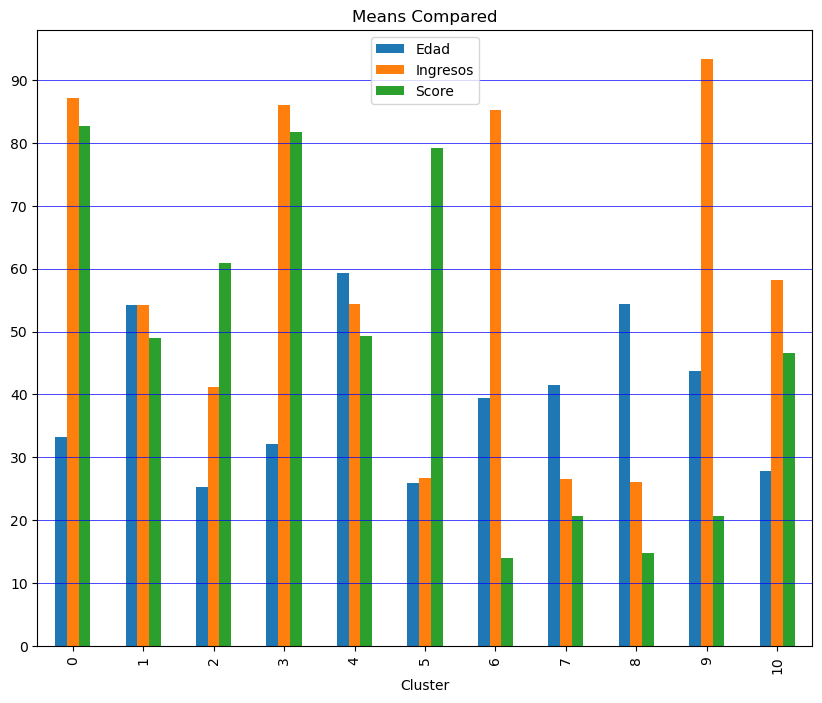

In [223]:
ax = customers_p.groupby('Cluster').mean().plot(kind='bar',figsize=(10,8), title='Means Compared')
ax.set_yticks(range(0, int(ax.get_ylim()[1]) + 1, 10))
y_ticks = ax.get_yticks()
for y in y_ticks:
    ax.axhline(y=y, color='blue', linestyle='-', linewidth=0.5)
plt.show()

We can observe that in clusters 0-1-9 there is a combination of high Score values but low Income.

4-7 high Score and Income.

The lower Scores, are from customers with 40 years old or older.

We have to take a look on the cluster 1 because they have lots of income but low shopping Score.